In [44]:
import pandas as pd

## Importing Data

In [45]:
data = pd.read_csv("musk_csv.csv")

In [46]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


## Checking For Missing Values

In [48]:
print("Number of missing values in the data = ", data.isnull().sum().sum())

Number of missing values in the data =  0


### Is conformation_name a categorical variable ?

In [49]:
pd.unique(data['conformation_name']).shape[0]

6598

conformation_name is not a categorical variable.

In [50]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


## Splitting the data

In [51]:
# Spitting the data into musk and non_musk
musk_data = data[data['class'] == 1]
nonmusk_data = data[data['class'] == 0]

In [52]:
# Calculating the 80% splits for musk and non_musk

musk_split = int(0.8 * musk_data.shape[0])
nonmusk_split = int(0.8 * nonmusk_data.shape[0])

# splitting the data into train and validate data for musk and non_musk
train_musk = musk_data.iloc[0: musk_split + 1, 0:]
val_musk = musk_data.iloc[musk_split + 1: , 0:]

train_nonmusk = nonmusk_data.iloc[0: nonmusk_split + 1, 0:]
val_nonmusk = nonmusk_data.iloc[nonmusk_split + 1: , 0:]

In [53]:
# concatenating all the training data and validation data
train_data = pd.concat([train_musk, train_nonmusk], ignore_index = True)
val_data = pd.concat([val_musk, val_nonmusk], ignore_index = True)

In [54]:
train_data

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,5478,NON-MUSK-j146,j146_4+248,57,-174,-67,-84,-107,70,-119,...,-307,49,13,32,100,180,-40,-116,131,0
5275,5479,NON-MUSK-j146,j146_4+249,36,-39,-17,102,-117,-17,90,...,-195,-202,-25,8,107,200,-53,-152,119,0
5276,5480,NON-MUSK-j146,j146_4+25,36,-136,-109,100,-117,-7,215,...,-49,-172,-25,6,106,201,-54,-153,118,0
5277,5481,NON-MUSK-j146,j146_4+250,36,-35,-19,11,-117,86,90,...,-176,-124,-62,-28,100,209,-52,-158,126,0


In [55]:
val_data

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,815,MUSK-f152,f152_1+36,38,-199,-119,23,-117,-5,136,...,-59,-3,-122,-63,32,174,-63,-146,71,1
1,816,MUSK-f152,f152_1+4,32,-93,-61,-48,-117,45,38,...,-299,55,-63,-30,34,156,-61,-132,57,1
2,817,MUSK-f152,f152_1+5,32,-93,-60,-79,-117,15,38,...,73,43,-63,-29,34,157,-61,-132,58,1
3,818,MUSK-f152,f152_1+6,33,-158,-62,-76,-117,5,26,...,-70,-119,-71,-31,35,157,-61,-133,58,1
4,819,MUSK-f152,f152_1+7,33,-158,-61,-79,-117,14,26,...,74,47,-71,-30,35,157,-61,-132,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
1315,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
1316,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
1317,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0


In [56]:
# Randomizing the data
train_data = train_data.sample(frac = 1, random_state = 1)
val_data = val_data.sample(frac = 1, random_state = 1)

In [57]:
# Dropping the ID, molecule_name, conformation_name columns
train_data.drop(["ID", "molecule_name", "conformation_name"], axis = 1, inplace = True)
val_data.drop(["ID", "molecule_name", "conformation_name"], axis = 1, inplace = True)

In [58]:
train_data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
3854,218,-135,-145,-76,-117,11,56,-169,-40,-23,...,-78,-133,-127,8,71,276,34,-196,190,0
3587,55,2,81,31,-108,-104,38,31,2,-116,...,-265,-208,46,106,59,239,-64,-216,80,0
2824,44,86,16,-12,-117,-137,-165,53,-229,222,...,-288,-205,9,143,122,161,-66,-146,-12,0
1070,142,-199,-101,-76,-117,10,26,-94,-22,-23,...,-78,-133,47,209,283,141,-60,-119,47,0
2945,35,-196,-138,100,-117,3,-42,-6,61,-178,...,-262,-206,-10,20,110,203,-53,-154,121,0


In [59]:
val_data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
288,35,-100,-126,10,-117,85,87,-1,-50,-124,...,-257,-184,-65,-30,100,211,-51,-158,129,0
190,44,-103,-19,-42,-117,-6,-168,52,-225,-23,...,-76,48,-9,150,129,159,-66,-145,-5,1
852,64,-167,28,127,-110,60,-107,115,-203,10,...,-290,51,10,23,82,191,-38,-123,142,0
596,38,-147,-138,132,-89,113,61,-2,-23,-94,...,-270,-212,-110,-115,71,239,-44,-178,153,0
186,44,-105,-20,-74,-117,88,-167,46,-230,30,...,-12,52,-9,150,129,159,-66,-145,-5,1


In [60]:
X_train = train_data.iloc[0:, 0:166]
Y_train = train_data.iloc[0:, 166]

X_test = val_data.iloc[0:, 0: 166]
Y_test = val_data.iloc[0:, 166]

## Standardizing the data

In [61]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

In [62]:
scaler = scaler.fit(X_train)

In [63]:
X_train_scaled = scaler.transform(X_train)

In [64]:
X_test_scaled = scaler.transform(X_test)

## Dimensionality Reduction Using PCA

In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [66]:
pca = PCA().fit(X_train_scaled)

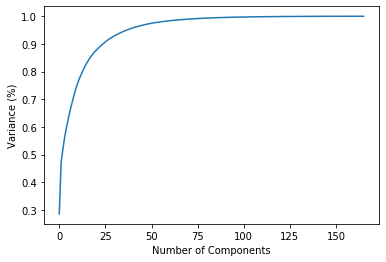

In [67]:
# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.show()

This plot tells us that selecting 75 components we can presearve something around 98 % of the variance of the total variance of the data

In [68]:
pca = PCA(n_components = 75, whiten = True)

In [69]:
X_train = pca.fit_transform(X_train_scaled)

In [70]:
X_test = pca.fit_transform(X_test_scaled)

In [100]:
X_train.shape

(5279, 75)

In [103]:
X_train2 = X_train.reshape((5279, 75, 1))

In [72]:
X_test.shape

(1319, 75)

In [155]:
X_test2 = X_test.reshape((1319, 75, 1))

In [73]:
Y_train = np.array(Y_train)
Y_train.shape

(5279,)

In [74]:
Y_test = np.array(Y_test)
Y_test[1]

1

## Training Model

In [98]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, GlobalMaxPooling1D

In [165]:
# Applying A CNN model

model = Sequential()

model.add(Conv1D(100, 75, input_shape = (75, 1)))
model.add(Activation('relu'))
model.add(GlobalMaxPooling1D())

model.add(Flatten())

model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train2, Y_train, batch_size = 50, epochs = 10, validation_split = 0.2)

Train on 4223 samples, validate on 1056 samples
Epoch 1/10
4223/4223 [==============================] - 1s 267us/sample - loss: 0.2903 - accuracy: 0.8681 - val_loss: 0.1136 - val_accuracy: 0.9555
Epoch 2/10
4223/4223 [==============================] - 1s 121us/sample - loss: 0.0815 - accuracy: 0.9654 - val_loss: 0.0578 - val_accuracy: 0.9744
Epoch 3/10
4223/4223 [==============================] - 0s 114us/sample - loss: 0.0233 - accuracy: 0.9927 - val_loss: 0.0278 - val_accuracy: 0.9924
Epoch 4/10
4223/4223 [==============================] - 0s 101us/sample - loss: 0.0099 - accuracy: 0.9979 - val_loss: 0.0360 - val_accuracy: 0.9896
Epoch 5/10
4223/4223 [==============================] - 0s 103us/sample - loss: 0.0074 - accuracy: 0.9981 - val_loss: 0.0326 - val_accuracy: 0.9905
Epoch 6/10
4223/4223 [==============================] - 0s 116us/sample - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0270 - val_accuracy: 0.9934
Epoch 7/10
4223/4223 [==============================] - 0s 116us

## Graphs

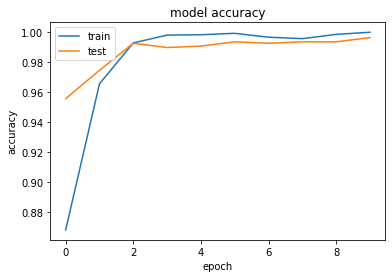

In [166]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

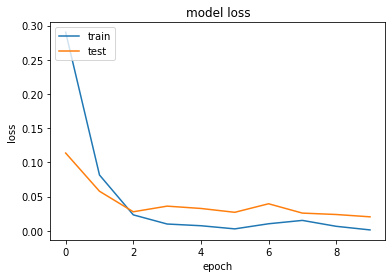

In [167]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Performance Measures

In [178]:
print('Validation Accuracy = ',history.history['val_accuracy'][9])

Validation Accuracy =  0.9962121


In [179]:
print('Validation Loss =', history.history['val_loss'][9])

Validation Loss = 0.020372091835811793


In [180]:
results = model.evaluate(X_test2, Y_test, batch_size = 50)
print(results)

1319/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.931332509024203, 0.7460197]


In [186]:
predictions = model.predict(X_test2)

def func(x):
    if x > 0.5: return 1
    else : return 0
    
pred = np.array([func(x) for x in predictions])

from sklearn.metrics import classification_report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1116
           1       0.22      0.25      0.23       203

    accuracy                           0.75      1319
   macro avg       0.54      0.54      0.54      1319
weighted avg       0.76      0.75      0.75      1319



## Saving the model

In [170]:
model.save('model.h5')